# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Again, I'll load the NSFG pregnancy file and select live births:

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

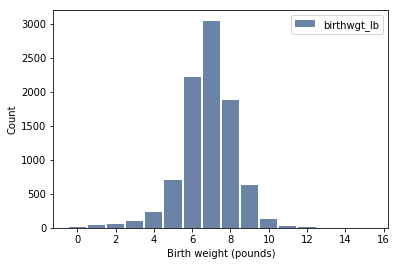

In [3]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

To normalize the disrtibution, we could divide through by the total count:

In [4]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

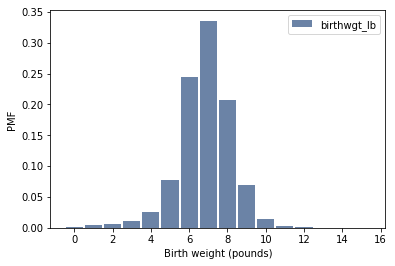

In [5]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

More directly, we can create a Pmf object.

In [6]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [7]:
pmf.Prob(2)

0.4

The bracket operator does the same thing.

In [8]:
pmf[2]

0.4

The `Incr` method adds to the probability associated with a given values.

In [9]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

The `Mult` method multiplies the probability associated with a value.

In [10]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [11]:
pmf.Total()

0.8999999999999999

`Normalize` divides through by the total probability, making it 1 again.

In [12]:
pmf.Normalize()
pmf.Total()

1.0

Here's the PMF of pregnancy length for live births.

In [13]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

Here's what it looks like plotted with `Hist`, which makes a bar graph.

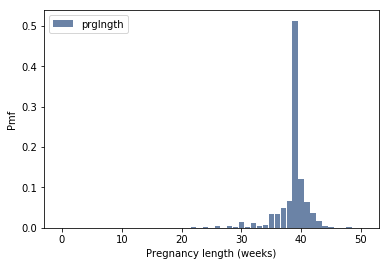

In [14]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

Here's what it looks like plotted with `Pmf`, which makes a step function.

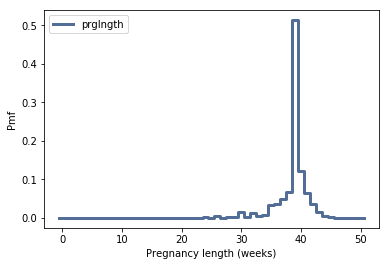

In [15]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [16]:
live, firsts, others = first.MakeFrames()

Here are the distributions of pregnancy length.

In [17]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

And here's the code that replicates one of the figures in the chapter.

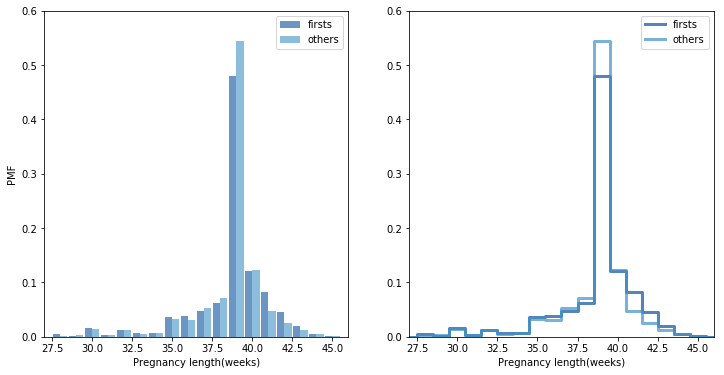

In [18]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

No handles with labels found to put in legend.


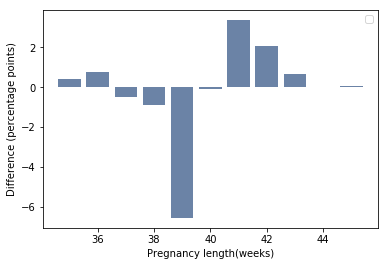

In [19]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [20]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [21]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

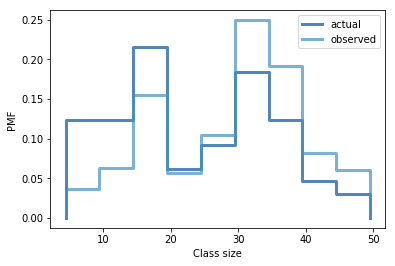

In [22]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [23]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [24]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [25]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

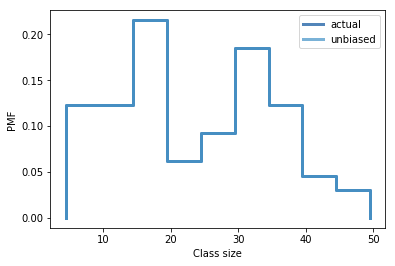

In [26]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

### Pandas indexing

Here's an example of a small DataFrame.

In [27]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,-1.440933,-0.352558
1,-1.385479,-0.315534
2,1.212371,-0.746439
3,0.654607,0.604487


We can specify column names when we create the DataFrame:

In [28]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-1.440933,-0.352558
1,-1.385479,-0.315534
2,1.212371,-0.746439
3,0.654607,0.604487


We can also specify an index that contains labels for the rows.

In [29]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-1.440933,-0.352558
b,-1.385479,-0.315534
c,1.212371,-0.746439
d,0.654607,0.604487


Normal indexing selects columns.

In [30]:
df['A']

a   -1.440933
b   -1.385479
c    1.212371
d    0.654607
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [31]:
df.loc['a']

A   -1.440933
B   -0.352558
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [32]:
df.iloc[0]

A   -1.440933
B   -0.352558
Name: a, dtype: float64

`loc` can also take a list of labels.

In [33]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-1.440933,-0.352558
c,1.212371,-0.746439


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [34]:
df['a':'c']

,A,B
a,-1.440933,-0.352558
b,-1.385479,-0.315534
c,1.212371,-0.746439


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [35]:
df[0:2]

,A,B
a,-1.440933,-0.352558
b,-1.385479,-0.315534


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [37]:
resp = nsfg.ReadFemResp()

In [38]:
# Solution goes here
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

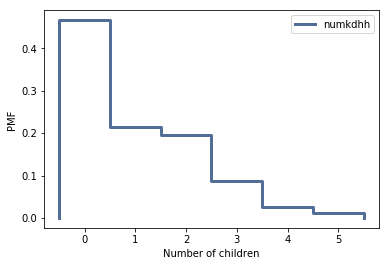

In [39]:
# Solution goes here
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [40]:
# Solution goes here
biased = BiasPmf(pmf, label='biased')

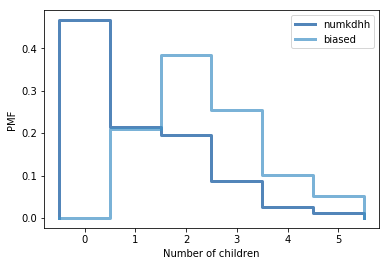

In [41]:
# Solution goes here
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [43]:
# Solution goes here
pmf.Mean()

1.024205155043831

In [44]:
# Solution goes here
biased.Mean()

2.403679100664282

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [45]:
live, firsts, others = first.MakeFrames()

In [46]:
preg_map = nsfg.MakePregMap(live)

In [55]:
# Solution goes here
hist = thinkstats2.Hist()

for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1

0    39
1    39
Name: prglngth, dtype: int64
0
2    39
3    39
Name: prglngth, dtype: int64
0
5    38
6    40
Name: prglngth, dtype: int64
2
8    39
9    35
Name: prglngth, dtype: int64
-4
11    39
12    37
Name: prglngth, dtype: int64
-2
15    33
16    33
Name: prglngth, dtype: int64
0
19    41
20    39
Name: prglngth, dtype: int64
-2
23    39
24    39
Name: prglngth, dtype: int64
0
27    42
28    37
Name: prglngth, dtype: int64
-5
32    38
33    39
Name: prglngth, dtype: int64
1
39    39
40    36
Name: prglngth, dtype: int64
-3
42    36
43    40
Name: prglngth, dtype: int64
4
44    39
47    39
Name: prglngth, dtype: int64
0
48    39
49    39
Name: prglngth, dtype: int64
0
52    39
53    37
Name: prglngth, dtype: int64
-2
55    40
56    40
Name: prglngth, dtype: int64
0
58    41
59    37
Name: prglngth, dtype: int64
-4
62    39
64    38
Name: prglngth, dtype: int64
-1
68    40
69    36
Name: prglngth, dtype: int64
-4
70    39
71    39
Name: prglngth, dtype: int64
0
72    39
74    39
N

Name: prglngth, dtype: int64
0
1330    39
1332    38
Name: prglngth, dtype: int64
-1
1333    39
1335    41
Name: prglngth, dtype: int64
2
1337    30
1338    32
Name: prglngth, dtype: int64
2
1344    37
1345    40
Name: prglngth, dtype: int64
3
1346    40
1347    38
Name: prglngth, dtype: int64
-2
1350    39
1351    40
Name: prglngth, dtype: int64
1
1353    39
1354    39
Name: prglngth, dtype: int64
0
1357    42
1359    32
Name: prglngth, dtype: int64
-10
1365    39
1366    39
Name: prglngth, dtype: int64
0
1376    35
1377    38
Name: prglngth, dtype: int64
3
1379    39
1380    39
Name: prglngth, dtype: int64
0
1384    36
1385    36
Name: prglngth, dtype: int64
0
1388    42
1389    42
Name: prglngth, dtype: int64
0
1390    33
1391    41
Name: prglngth, dtype: int64
8
1397    42
1399    38
Name: prglngth, dtype: int64
-4
1400    39
1401    39
Name: prglngth, dtype: int64
0
1403    38
1404    39
Name: prglngth, dtype: int64
1
1408    38
1409    40
Name: prglngth, dtype: int64
2
1412    37

2092    39
2093    39
Name: prglngth, dtype: int64
0
2098    39
2099    38
Name: prglngth, dtype: int64
-1
2100    43
2101    44
Name: prglngth, dtype: int64
1
2105    39
2106    39
Name: prglngth, dtype: int64
0
2108    39
2110    39
Name: prglngth, dtype: int64
0
2113    39
2114    39
Name: prglngth, dtype: int64
0
2116    40
2117    42
Name: prglngth, dtype: int64
2
2122    39
2123    39
Name: prglngth, dtype: int64
0
2130    38
2131    37
Name: prglngth, dtype: int64
-1
2133    32
2134    39
Name: prglngth, dtype: int64
7
2136    36
2137    38
Name: prglngth, dtype: int64
2
2139    40
2140    40
Name: prglngth, dtype: int64
0
2145    43
2147    38
Name: prglngth, dtype: int64
-5
2149    39
2150    39
Name: prglngth, dtype: int64
0
2151    37
2152    37
Name: prglngth, dtype: int64
0
2154    39
2157    41
Name: prglngth, dtype: int64
2
2159    39
2160    39
Name: prglngth, dtype: int64
0
2163    38
2164    38
Name: prglngth, dtype: int64
0
2167    40
2168    39
Name: prglngth, dtype

Name: prglngth, dtype: int64
0
2819    39
2820    39
Name: prglngth, dtype: int64
0
2822    40
2823    36
Name: prglngth, dtype: int64
-4
2824    40
2825    32
Name: prglngth, dtype: int64
-8
2826    39
2827    39
Name: prglngth, dtype: int64
0
2830    39
2831    39
Name: prglngth, dtype: int64
0
2832    39
2833    39
Name: prglngth, dtype: int64
0
2837    30
2838    39
Name: prglngth, dtype: int64
9
2843    39
2844    40
Name: prglngth, dtype: int64
1
2851    37
2852    36
Name: prglngth, dtype: int64
-1
2853    40
2854    38
Name: prglngth, dtype: int64
-2
2857    44
2859    41
Name: prglngth, dtype: int64
-3
2860    39
2861    39
Name: prglngth, dtype: int64
0
2864    43
2865    43
Name: prglngth, dtype: int64
0
2869    39
2870    39
Name: prglngth, dtype: int64
0
2876    41
2877    36
Name: prglngth, dtype: int64
-5
2880    34
2881    42
Name: prglngth, dtype: int64
8
2883    33
2884    41
Name: prglngth, dtype: int64
8
2887    39
2888    42
Name: prglngth, dtype: int64
3
2894    3

Name: prglngth, dtype: int64
-3
4087    39
4088    39
Name: prglngth, dtype: int64
0
4091    39
4092    39
Name: prglngth, dtype: int64
0
4095    35
4096    39
Name: prglngth, dtype: int64
4
4097    39
4098    39
Name: prglngth, dtype: int64
0
4100    39
4101    39
Name: prglngth, dtype: int64
0
4105    43
4106    39
Name: prglngth, dtype: int64
-4
4107    39
4108     4
Name: prglngth, dtype: int64
-35
4116    36
4117    40
Name: prglngth, dtype: int64
4
4120    40
4121    37
Name: prglngth, dtype: int64
-3
4122    39
4123    39
Name: prglngth, dtype: int64
0
4124    39
4125    39
Name: prglngth, dtype: int64
0
4129    40
4130    36
Name: prglngth, dtype: int64
-4
4131    40
4132    39
Name: prglngth, dtype: int64
-1
4134    41
4135    39
Name: prglngth, dtype: int64
-2
4137    38
4139    40
Name: prglngth, dtype: int64
2
4140    39
4141    39
Name: prglngth, dtype: int64
0
4147    39
4148    39
Name: prglngth, dtype: int64
0
4152    41
4153    38
Name: prglngth, dtype: int64
-3
4159  

5452    41
5453    40
Name: prglngth, dtype: int64
-1
5454    42
5455    42
Name: prglngth, dtype: int64
0
5456    39
5457    37
Name: prglngth, dtype: int64
-2
5459    39
5460    39
Name: prglngth, dtype: int64
0
5463    39
5464    39
Name: prglngth, dtype: int64
0
5469    40
5470    40
Name: prglngth, dtype: int64
0
5471    39
5473    35
Name: prglngth, dtype: int64
-4
5482    26
5483    39
Name: prglngth, dtype: int64
13
5487    36
5488    36
Name: prglngth, dtype: int64
0
5491    42
5492    42
Name: prglngth, dtype: int64
0
5504    39
5505    39
Name: prglngth, dtype: int64
0
5508    38
5509    38
Name: prglngth, dtype: int64
0
5511    41
5513    40
Name: prglngth, dtype: int64
-1
5516    29
5518    31
Name: prglngth, dtype: int64
2
5521    39
5524    37
Name: prglngth, dtype: int64
-2
5535    37
5537    35
Name: prglngth, dtype: int64
-2
5540    39
5541    39
Name: prglngth, dtype: int64
0
5547    39
5549    39
Name: prglngth, dtype: int64
0
5552    39
5553    39
Name: prglngth, d

0
6704    35
6706    39
Name: prglngth, dtype: int64
4
6711    36
6712    39
Name: prglngth, dtype: int64
3
6713    39
6714    30
Name: prglngth, dtype: int64
-9
6718    39
6719    39
Name: prglngth, dtype: int64
0
6723    39
6724    39
Name: prglngth, dtype: int64
0
6726    40
6727    41
Name: prglngth, dtype: int64
1
6732    30
6733    39
Name: prglngth, dtype: int64
9
6738    35
6740    35
Name: prglngth, dtype: int64
0
6742    39
6743    39
Name: prglngth, dtype: int64
0
6750    39
6751    39
Name: prglngth, dtype: int64
0
6753    40
6754    41
Name: prglngth, dtype: int64
1
6755    40
6756    39
Name: prglngth, dtype: int64
-1
6757    39
6758    33
Name: prglngth, dtype: int64
-6
6760    40
6761    40
Name: prglngth, dtype: int64
0
6763    39
6764    40
Name: prglngth, dtype: int64
1
6766    39
6767    39
Name: prglngth, dtype: int64
0
6775    39
6776    39
Name: prglngth, dtype: int64
0
6777    39
6778    39
Name: prglngth, dtype: int64
0
6779    39
6780    39
Name: prglngth, dty

Name: prglngth, dtype: int64
0
7522    39
7523    39
Name: prglngth, dtype: int64
0
7526    39
7527    39
Name: prglngth, dtype: int64
0
7529    39
7531    40
Name: prglngth, dtype: int64
1
7535    39
7536    41
Name: prglngth, dtype: int64
2
7539    39
7540    39
Name: prglngth, dtype: int64
0
7543    39
7544    26
Name: prglngth, dtype: int64
-13
7559    39
7560    39
Name: prglngth, dtype: int64
0
7562    39
7563    39
Name: prglngth, dtype: int64
0
7568    40
7569    40
Name: prglngth, dtype: int64
0
7571    39
7573    39
Name: prglngth, dtype: int64
0
7575    40
7576    39
Name: prglngth, dtype: int64
-1
7577    35
7579    39
Name: prglngth, dtype: int64
4
7584    37
7585    40
Name: prglngth, dtype: int64
3
7586    41
7590    39
Name: prglngth, dtype: int64
-2
7593    39
7594    39
Name: prglngth, dtype: int64
0
7597    37
7598    39
Name: prglngth, dtype: int64
2
7603    36
7604    31
Name: prglngth, dtype: int64
-5
7605    41
7606    39
Name: prglngth, dtype: int64
-2
7610    3

8842    39
8844    39
Name: prglngth, dtype: int64
0
8845    32
8846    33
Name: prglngth, dtype: int64
1
8852    39
8854    39
Name: prglngth, dtype: int64
0
8861    39
8862    39
Name: prglngth, dtype: int64
0
8867    39
8868    39
Name: prglngth, dtype: int64
0
8869    39
8870    22
Name: prglngth, dtype: int64
-17
8871    35
8872    35
Name: prglngth, dtype: int64
0
8873    39
8874    39
Name: prglngth, dtype: int64
0
8875    40
8876    40
Name: prglngth, dtype: int64
0
8882    39
8883    39
Name: prglngth, dtype: int64
0
8887    39
8888    39
Name: prglngth, dtype: int64
0
8891    42
8892    42
Name: prglngth, dtype: int64
0
8898    38
8899    35
Name: prglngth, dtype: int64
-3
8904    39
8905    39
Name: prglngth, dtype: int64
0
8906    38
8907    40
Name: prglngth, dtype: int64
2
8908    39
8909    40
Name: prglngth, dtype: int64
1
8911    36
8915    36
Name: prglngth, dtype: int64
0
8925    36
8926    39
Name: prglngth, dtype: int64
3
8930    36
8931    37
Name: prglngth, dtype

10093    40
10096    41
Name: prglngth, dtype: int64
1
10098    35
10099    39
Name: prglngth, dtype: int64
4
10101    41
10102    40
Name: prglngth, dtype: int64
-1
10106    39
10107    39
Name: prglngth, dtype: int64
0
10109    40
10110    38
Name: prglngth, dtype: int64
-2
10112    36
10114    42
Name: prglngth, dtype: int64
6
10119    28
10120    40
Name: prglngth, dtype: int64
12
10129    37
10130    37
Name: prglngth, dtype: int64
0
10135    39
10136    39
Name: prglngth, dtype: int64
0
10139    37
10140    35
Name: prglngth, dtype: int64
-2
10146    39
10148    40
Name: prglngth, dtype: int64
1
10153    39
10154    37
Name: prglngth, dtype: int64
-2
10156    26
10157    36
Name: prglngth, dtype: int64
10
10158    39
10159    34
Name: prglngth, dtype: int64
-5
10160    39
10161    39
Name: prglngth, dtype: int64
0
10163    40
10164    38
Name: prglngth, dtype: int64
-2
10167    40
10170    41
Name: prglngth, dtype: int64
1
10177    39
10178    39
Name: prglngth, dtype: int64
0
10

Name: prglngth, dtype: int64
0
11418    39
11419    39
Name: prglngth, dtype: int64
0
11424    38
11425    38
Name: prglngth, dtype: int64
0
11429    38
11430    38
Name: prglngth, dtype: int64
0
11431    40
11432    38
Name: prglngth, dtype: int64
-2
11435    39
11437    39
Name: prglngth, dtype: int64
0
11444    41
11445    41
Name: prglngth, dtype: int64
0
11446    39
11447    39
Name: prglngth, dtype: int64
0
11452    39
11453    39
Name: prglngth, dtype: int64
0
11456    39
11457    39
Name: prglngth, dtype: int64
0
11460    33
11461    42
Name: prglngth, dtype: int64
9
11463    39
11464    39
Name: prglngth, dtype: int64
0
11468    40
11469    39
Name: prglngth, dtype: int64
-1
11475    39
11476    40
Name: prglngth, dtype: int64
1
11481    39
11482    30
Name: prglngth, dtype: int64
-9
11486    39
11487    39
Name: prglngth, dtype: int64
0
11489    39
11490    39
Name: prglngth, dtype: int64
0
11491    41
11492    39
Name: prglngth, dtype: int64
-2
11499    39
11500    39
Name: 

Name: prglngth, dtype: int64
6
12690    35
12691    39
Name: prglngth, dtype: int64
4
12693    39
12694    30
Name: prglngth, dtype: int64
-9
12698    39
12699    39
Name: prglngth, dtype: int64
0
12700    39
12701    39
Name: prglngth, dtype: int64
0
12706    35
12708    39
Name: prglngth, dtype: int64
4
12712    39
12713    39
Name: prglngth, dtype: int64
0
12714    38
12715    40
Name: prglngth, dtype: int64
2
12717    28
12719    43
Name: prglngth, dtype: int64
15
12721    40
12722    40
Name: prglngth, dtype: int64
0
12727    42
12730    39
Name: prglngth, dtype: int64
-3
12732    40
12733    39
Name: prglngth, dtype: int64
-1
12737    38
12738    37
Name: prglngth, dtype: int64
-1
12742    40
12743    40
Name: prglngth, dtype: int64
0
12745    41
12746    39
Name: prglngth, dtype: int64
-2
12758    40
12759    40
Name: prglngth, dtype: int64
0
12761    39
12763    32
Name: prglngth, dtype: int64
-7
12766    40
12767    42
Name: prglngth, dtype: int64
2
12777    39
12778    40
Nam

13516    39
13517    39
Name: prglngth, dtype: int64
0
13522    41
13523    41
Name: prglngth, dtype: int64
0
13525    42
13527    37
Name: prglngth, dtype: int64
-5
13528    35
13529    35
Name: prglngth, dtype: int64
0
13538    39
13539    39
Name: prglngth, dtype: int64
0
13544    39
13545    30
Name: prglngth, dtype: int64
-9
13547    30
13548    39
Name: prglngth, dtype: int64
9
13551    38
13552    38
Name: prglngth, dtype: int64
0
13555    39
13556    39
Name: prglngth, dtype: int64
0
13560    40
13561    44
Name: prglngth, dtype: int64
4
13562    38
13563    40
Name: prglngth, dtype: int64
2
13569    38
13570    39
Name: prglngth, dtype: int64
1
13573    39
13574    39
Name: prglngth, dtype: int64
0
13578    39
13579    39
Name: prglngth, dtype: int64
0
13588    39
13591    39
Name: prglngth, dtype: int64
0


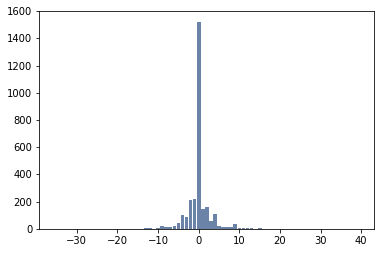

In [50]:
# Solution goes here
thinkplot.Hist(hist)

In [51]:
# Solution goes here
pmf = thinkstats2.Pmf(hist)
pmf.Mean()

-0.056367432150313125

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [56]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

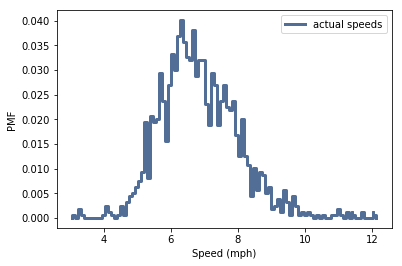

In [57]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [50]:
# Solution goes here

In [51]:
# Solution goes here